In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [2]:
import pickle

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [6]:
def tokeniser(sentence):
 
    # Remove ||| from kaggle dataset
    sentence = re.sub("[]|||[]", " ", sentence)

    # remove reddit subreddit urls
    sentence = re.sub("/r/[0-9A-Za-z]", "", sentence)

    # remove MBTI types
    MBTI_types = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
              'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ',
              'MBTI']
    MBTI_types = [ti.lower() for ti in MBTI_types] + [ti.lower() + 's' for ti in MBTI_types]

    tokens = nlp(sentence)

    tokens = [ti for ti in tokens if ti.lower_ not in STOP_WORDS]
    tokens = [ti for ti in tokens if not ti.is_space]
    tokens = [ti for ti in tokens if not ti.is_punct]
    tokens = [ti for ti in tokens if not ti.like_num]
    tokens = [ti for ti in tokens if not ti.like_url]
    tokens = [ti for ti in tokens if not ti.like_email]
    tokens = [ti for ti in tokens if ti.lower_ not in MBTI_types]


    # lemmatize
    tokens = [ti.lemma_ for ti in tokens if ti.lemma_ not in STOP_WORDS]
    tokens = [ti for ti in tokens if len(ti) > 1]

    return tokens

In [7]:
dummy_fn = lambda x:x

In [8]:
with open('./pickle files/cv.pickle', 'rb') as f:
    cv = pickle.load(f)

In [9]:
with open('./pickle files/idf_transformer.pickle', 'rb') as f:
    idf_transformer = pickle.load(f)

In [10]:
# loading the pickle files with the classifiers
with open('./pickle files/LR_clf_IE_kaggle.pickle', 'rb') as f:
    lr_ie = pickle.load(f)
with open('./pickle files/LR_clf_JP_kaggle.pickle', 'rb') as f:
    lr_jp = pickle.load(f)
with open('./pickle files/LR_clf_NS_kaggle.pickle', 'rb') as f:
    lr_ns = pickle.load(f)
with open('./pickle files/LR_clf_TF_kaggle.pickle', 'rb') as f:
    lr_tf = pickle.load(f)

In [11]:
# creating the functions to predict the personality types
def predict_EI(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'E': lr_ie.predict_proba(x)[0][0], 'I': lr_ie.predict_proba(x)[0][1]}

def predict_JP(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'J': lr_jp.predict_proba(x)[0][1], 'P': lr_jp.predict_proba(x)[0][0]}

def predict_NS(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'N': lr_ns.predict_proba(x)[0][1], 'S': lr_ns.predict_proba(x)[0][0]}

def predict_TF(mypost):
    c = cv.transform([tokeniser(mypost)])
    x = idf_transformer.transform(c)
    
    return {'T': lr_tf.predict_proba(x)[0][1], 'F': lr_tf.predict_proba(x)[0][0]}

In [12]:
parameters = {}

## Displaying the Results

In [13]:
from IPython.display import display
import ipywidgets as widgets

In [14]:
plt.style.use(['ggplot'])

In [15]:
output_text = widgets.Text()

In [19]:
input_text = widgets.Text(description='Description:', disabled=False)

def bind_input_to_output(sender):
    output_text.value = input_text.value
    
input_text.on_submit(bind_input_to_output)
input_text

Text(value='', description='Description:')

In [20]:
output_text.value

'A General Manager who has led Customer centric transformations in large complex organisations, influenced C suite executives and delivered Enterprise wide change in Data and Analytics. An authentic, people and values driven leader with proven success in coaching and developing high performing, geographically dispersed teams.  Key skills •\tSetting and taking ownership of organisational Customer strategy. •\tApplying strong commercial acumen to drive value creation from data, analytics and insights. •\tDelivering change by aligning stakeholders and driving engagement.  •\tSponsoring the application of scaled agile methodologies to rapidly deliver business value. •\tCreating, leading and inspiring teams through clarity of purpose and empowerment.'

Button(description='Evaluate', style=ButtonStyle())

Output()

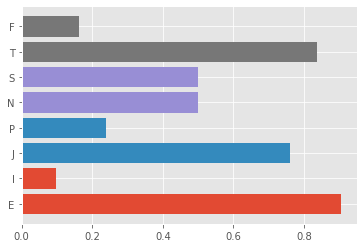

In [21]:
button = widgets.Button(description="Evaluate")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Evaluations")
        
        about = output_text.value
        
        plt.barh(*zip(*predict_EI(about).items()))
        plt.barh(*zip(*predict_JP(about).items()))
        plt.barh(*zip(*predict_NS(about).items()))
        plt.barh(*zip(*predict_TF(about).items()))

button.on_click(on_button_clicked)